# Problem definition

Create some data, in this case a parabola plus white noise:

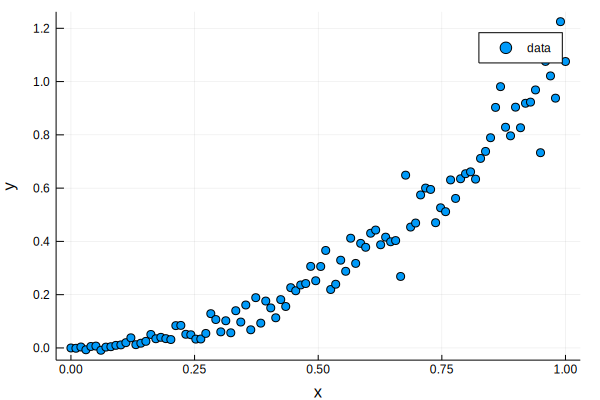

In [1]:
using Plots, Random

Random.seed!(2017)

N = 100
x = range(0, stop=1, length=N)
y = x.^2 .+ [i/1000*randn() for i=1:N]

scatter(x, y, xlab="x", ylab="y", label="data")

Define the problem:

In [2]:
using GeoStats

sdata   = PointSetData(Dict(:y => y), transpose(x))
sdomain = RegularGrid((0.,), (1.,), dims=(N,))
problem = EstimationProblem(sdata, sdomain, :y)

1D EstimationProblem
  data:      100 PointSetData{Float64,1}
  domain:    100 RegularGrid{Float64,1}
  variables: y (Float64)

# Solver options

The user can specify the number of neighbors (default to all data locations), a kernel (or variogram) function (default to `ExponentialVariogram`), and a metric from the [Distances.jl](https://github.com/JuliaStats/Distances.jl) package (default to Euclidean).

In [3]:
using LocallyWeightedRegression

solver = LocalWeightRegress(
    :y => (variogram=ExponentialVariogram(range=3/10),)
)

solution = solve(problem, solver)

1D EstimationSolution
  domain: 100 RegularGrid{Float64,1}
  variables: y

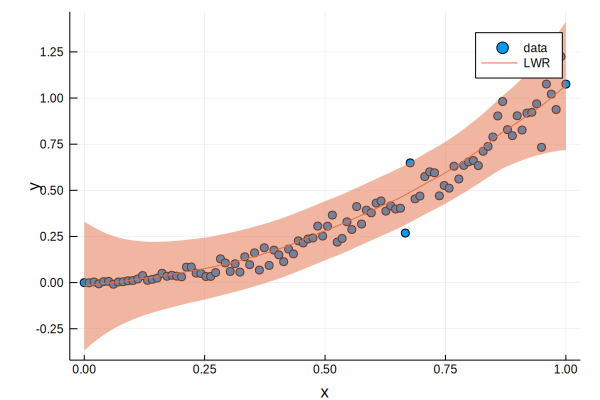

In [4]:
yhat, yvar = solution[:y]

scatter(x, y, xlab="x", ylab="y", label="data")
plot!(x, yhat, ribbon=yvar, fillalpha=.5, label="LWR")